# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

## Get data

/home/matt/projects/linear_confidence/deltas/data/loaders/MIMIC_IV.py:135: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  desired_df_data['RFD'].replace(-1, 2, inplace=True)
/home/matt/projects/linear_confidence/deltas/data/loaders/MIMIC_IV.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desired_df_data['RFD'].replace(-1, 2, inplace=True)

MIMIC-IV: 1624107
Number of attribues: 19
Classes total: 1616473 - 7634

Classes train: 161647 - 763
Classes test:  1454826 - 6871


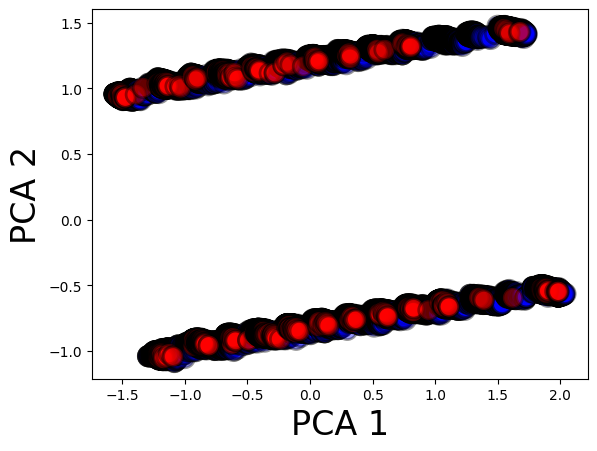

int64


In [2]:
dataset = 'MIMIC-IV' # change ind to select dataset to use
model = 'SVM-rbf'
model = 'MLP-small'
# model = 'Linear'

# dataset = datasets[7]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])
print(data_clf['data']['y'].dtype)

## Get Classifier

fitting MLP


/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


fit MLP 1


/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


fit MLP 2


/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


fit MLP 3
Baseline


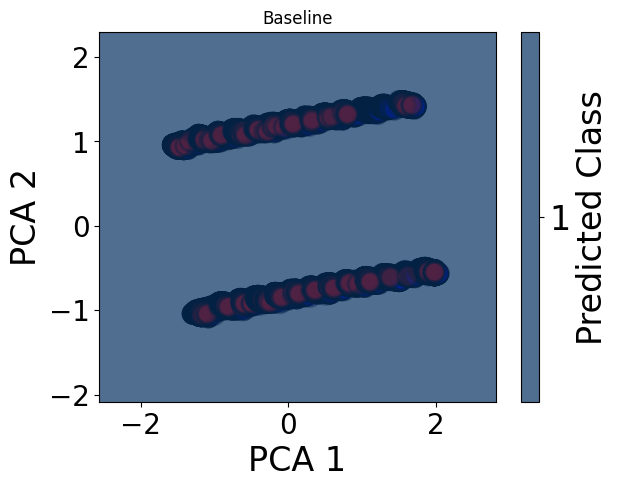

SMOTE


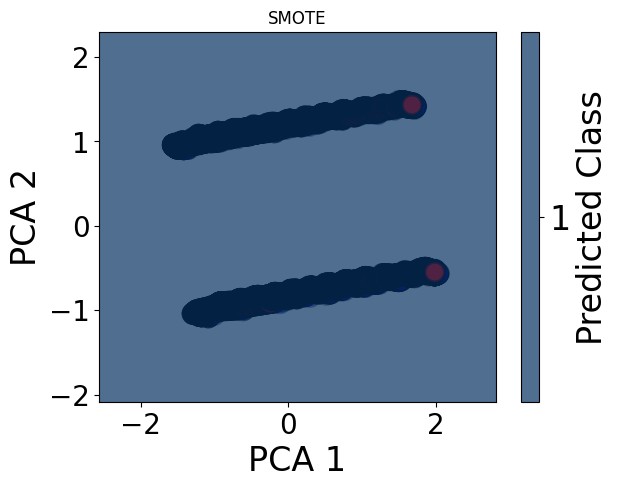

Balanced Weights


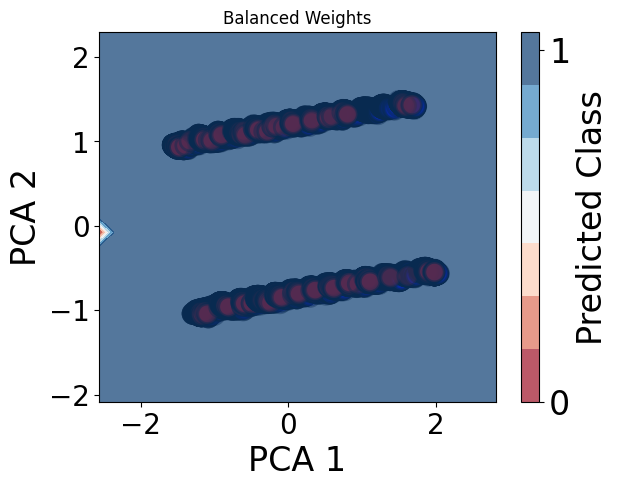

BMR


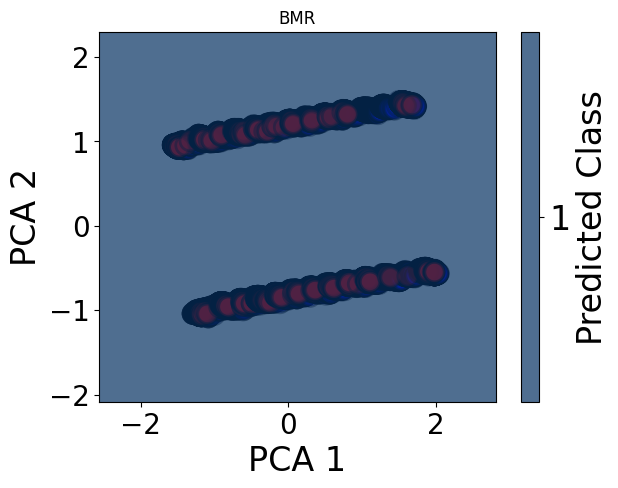

Threshold


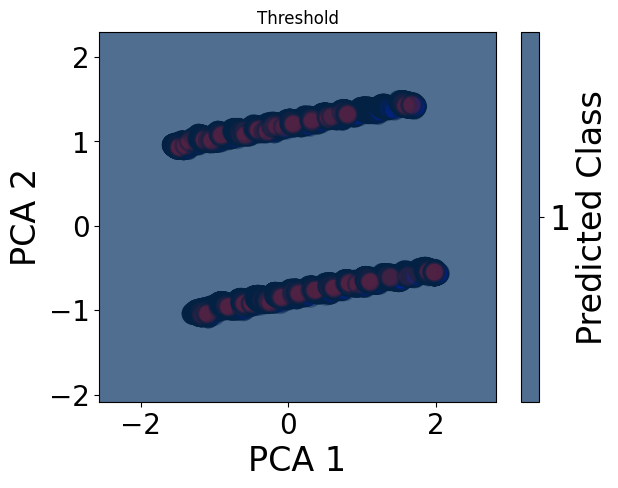

In [3]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Baseline']

## Fit deltas

Original Data
plotting training data as data input


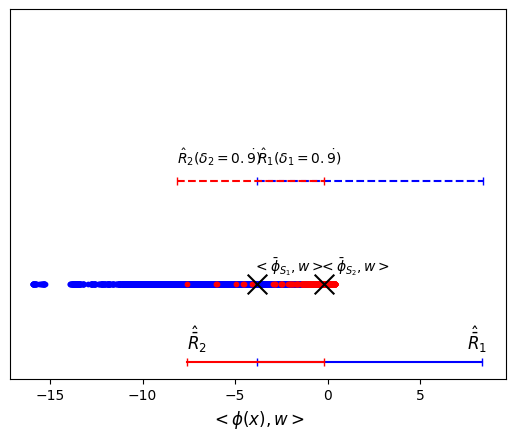

Unable to find result with downsample, increase the max_trials


In [4]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=1000,
                                                     parallel=True)

## Plot training data information

In [5]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

Not fit to any data yet, call 'fit(X, y)'  method first


## Show parameters

In [6]:
deltas_model.print_params()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

Not fit to any data yet, call 'fit(X, y)' or  method first
                  Accuracy    G-Mean        F1
Method                                        
Baseline          0.997706  0.747688  0.696204
SMOTE             0.988253  0.976647  0.435791
Balanced Weights  0.974776  0.974726  0.266473
BMR               0.977437  0.972283  0.287227
Threshold         0.977437  0.972283  0.287227
Our Method        0.997706  0.747688  0.696204 


Baseline


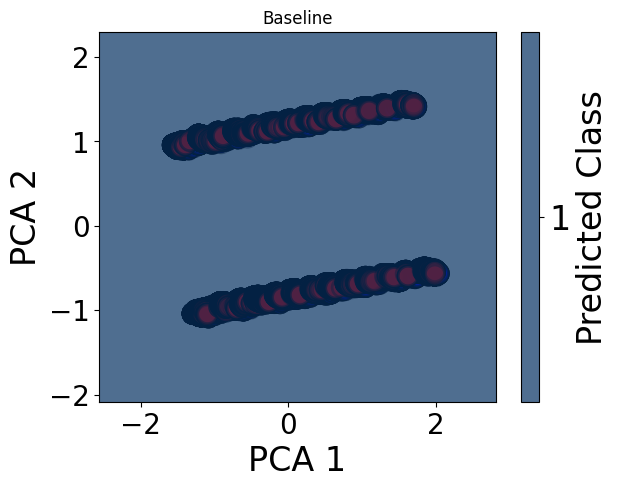

SMOTE


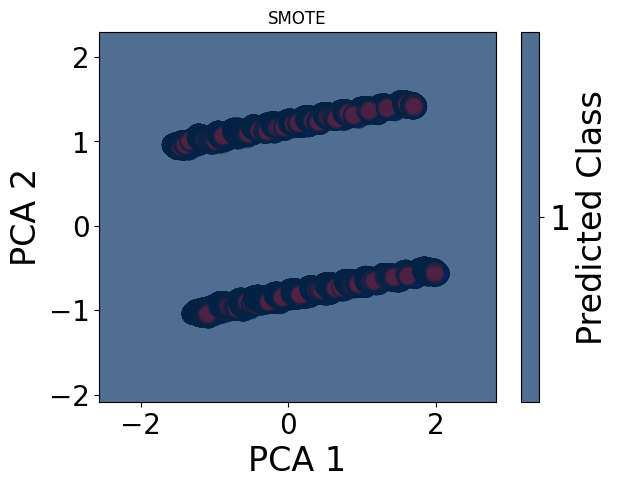

Balanced Weights


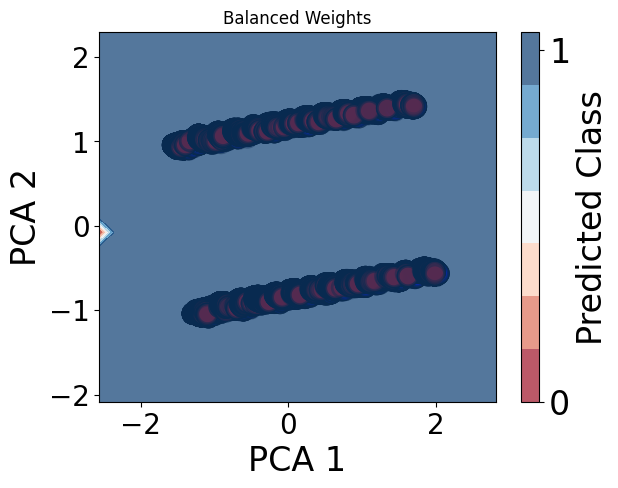

BMR


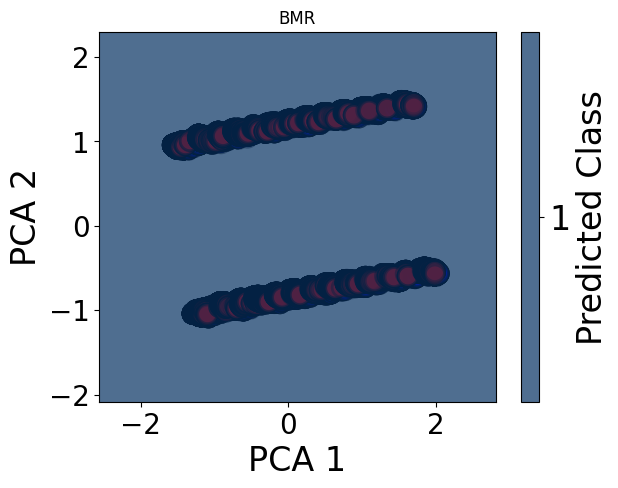

Threshold


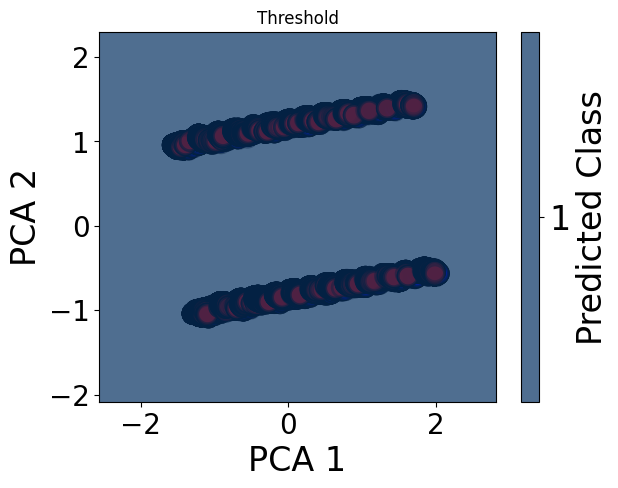

Our Method
Not fit to any data yet, call 'fit(X, y)' or  method first


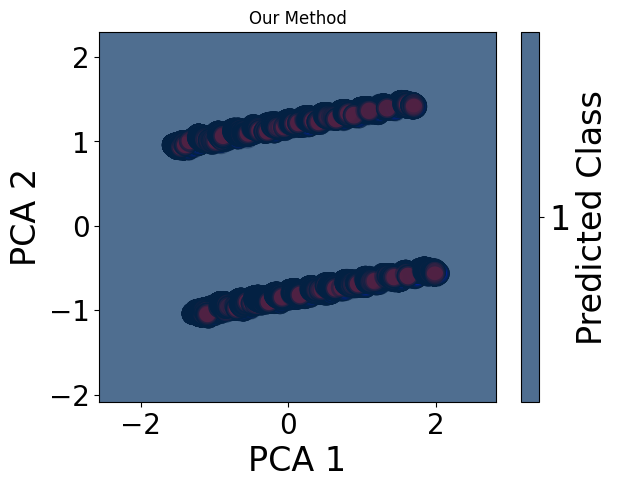

Giving bias from original classifier


/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


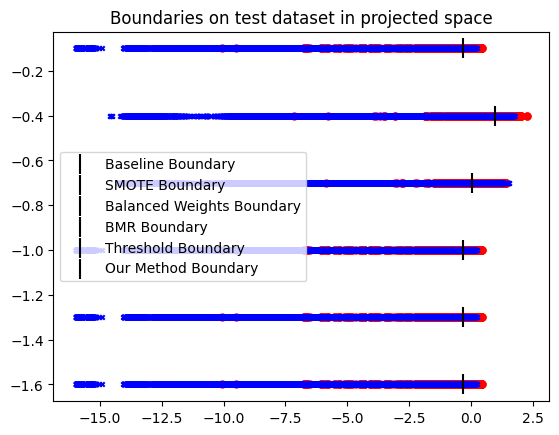

LATEX table format


\begin{tabular}{lrrr}
 & Accuracy & G-Mean & F1 \\
Method &  &  &  \\
Baseline & 0.9977 & 0.7477 & 0.6962 \\
SMOTE & 0.9883 & 0.9766 & 0.4358 \\
Balanced Weights & 0.9748 & 0.9747 & 0.2665 \\
BMR & 0.9774 & 0.9723 & 0.2872 \\
Threshold & 0.9774 & 0.9723 & 0.2872 \\
Our Method & 0.9977 & 0.7477 & 0.6962 \\
\end{tabular}



,Accuracy,G-Mean,F1
Method,,,
Baseline,0.997706,0.747688,0.696204
SMOTE,0.988253,0.976647,0.435791
Balanced Weights,0.974776,0.974726,0.266473
BMR,0.977437,0.972283,0.287227
Threshold,0.977437,0.972283,0.287227
Our Method,0.997706,0.747688,0.696204


In [7]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])